Nome da Familia            ID
<br>
<p>-----------------------------------------</p>
<pre>Goodware            0</pre>
<pre>Critroni            1</pre>
<pre>CryptLocker         2</pre>
<pre>CryptoWall          3</pre>
<pre>KOLLAH              4</pre>
<pre>Kovter              5</pre>
<pre>Locker              6</pre>
<pre>MATSNU              7</pre>
<pre>PGPCODER            8</pre>
<pre>Reveton             9</pre>
<pre>TeslaCrypt         10</pre>
<pre>Trojan-Ransom      11</pre>


In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Dense
from sklearn import metrics
import pandasql as ps
from utilsIA import *
import pandas as pd
import numpy as np
import itertools

<h2>Leitura do dataset


In [2]:
path = 'Ransoware.xlsx'
dataset = pd.read_excel(path)
dataset

,Ransomware,Classe,4,6,8,9,10,11,12,14,...,29079,29218,29287,29758,29769,29770,29796,29903,30200,30285
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1520,0,0,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1521,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1522,1,4,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


<h2>Redução da dimensão do dataset usando PCA</h2>
<LI>Reduzindo as 929 colunas de modo que mantenha uma alta representatividade com os dados originais

In [3]:
train_row = 900
columns = 929
column_init = 2
column_label = 1

train_label = dataset.iloc[:train_row, column_label]
train_data = dataset.iloc[:train_row, column_init:columns+column_init]

test_label = dataset.iloc[train_row:, column_label].reset_index(drop=True)
test_data = dataset.iloc[train_row:, column_init:columns + column_init].reset_index(drop=True)

In [4]:
n_comp = 165
pca = PCA(n_components=n_comp)
X_train_pca = pca.fit_transform(train_data.values)
X_test_pca = pca.transform(test_data.values)
print(f'Representação: {pca.explained_variance_ratio_.sum()}')

Representação: 0.97153504542637


In [5]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
df = pd.concat([X_train_pca, X_test_pca]).reset_index()
df['Classe']  = dataset['Classe']
df

,index,0,1,2,3,4,5,6,7,8,...,156,157,158,159,160,161,162,163,164,Classe
0,0,-4.821125,-0.487440,-2.201017,1.152447,-0.033623,1.352974,-0.578600,0.059564,0.038959,...,0.115148,0.103421,-0.104376,-0.231620,0.284686,-0.030963,-0.236094,-0.083272,-0.272600,0
1,1,-3.116892,-0.320086,-0.468679,0.077390,-0.733340,-0.059672,0.296803,-0.416835,-0.452211,...,0.101751,0.325636,-0.002376,-0.313922,-0.022878,-0.041444,-0.060774,0.070656,0.194865,0
2,2,-4.817464,-0.726339,-2.223047,0.763878,0.408207,0.848962,-0.412907,0.157133,0.103711,...,0.065331,0.060739,-0.128988,0.161537,-0.064245,0.291826,0.065284,0.049137,0.041736,4
3,3,5.331648,-2.676628,1.265138,0.893076,1.153713,-0.109961,0.198922,-0.561980,-0.057770,...,0.051302,-0.167546,-0.059634,0.079368,-0.197222,-0.082517,-0.037522,0.151464,-0.195261,0
4,4,4.054361,1.525786,-0.874177,-0.684646,-0.014614,-0.708375,0.977450,0.126336,-0.524389,...,0.033178,-0.038611,0.335333,-0.244373,-0.394885,0.096752,-0.368335,-0.112792,-0.044123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,619,-3.667744,-0.287221,-0.377622,-0.285508,-0.173065,-0.097861,-0.031989,-0.025919,0.053390,...,0.020537,0.383534,-0.370246,-0.057852,-0.031356,-0.057682,0.056819,-0.140004,0.179878,4
1520,620,1.207262,4.874456,3.782525,1.782034,0.379592,-0.096894,-0.562963,1.003049,-3.265090,...,-0.081596,-0.391890,0.388682,-0.282131,-0.360732,0.025402,0.029049,-0.041218,0.007335,0
1521,621,3.961603,1.436517,-1.136199,-0.921292,-0.807843,0.733954,1.622033,-2.877845,0.001690,...,-0.191991,-0.165364,0.056843,0.087625,-0.034292,-0.440394,-0.015218,0.325396,-0.005870,0
1522,622,-4.470373,-0.806404,-1.547585,0.073598,0.697804,0.348658,-0.494289,0.044260,0.074465,...,-0.379814,-0.259541,0.131464,-0.117940,-0.127719,-0.006793,-0.045719,0.209669,0.359047,4


<h3>Verificando a quantidade de cada Classe dentro do dataset

In [16]:
q1 = """
SELECT distinct count(*) as Quantidade,  Classe
FROM dataset 
group by Classe
order by Quantidade desc"""

ps.sqldf(q1)

,Quantidade,Classe
0,942,0
1,107,2
2,97,6
3,90,9
4,64,5
5,59,7
6,50,1
7,46,3
8,34,11
9,25,4


<h3>Exclusão das classes com poucas ocorrências</h3>
<li>Treinamento insuficiente do modelo</li>
<li>Teste insuficiente do modelo</li>
<li>Evitar alta acurácia por aleatoriedade</li>

In [7]:
df.drop(df.loc[df['Classe']==8].index, inplace=True)
df.drop(df.loc[df['Classe']==10].index, inplace=True)
df.drop(df.loc[df['Classe']==4].index, inplace=True)
df.drop('index', 1, inplace=True)
df

C:\Users\Edno\AppData\Local\Temp/ipykernel_15864/4213288135.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('index', 1, inplace=True)


,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,Classe
0,-4.821125,-0.487440,-2.201017,1.152447,-0.033623,1.352974,-0.578600,0.059564,0.038959,0.154728,...,0.115148,0.103421,-0.104376,-0.231620,0.284686,-0.030963,-0.236094,-0.083272,-0.272600,0
1,-3.116892,-0.320086,-0.468679,0.077390,-0.733340,-0.059672,0.296803,-0.416835,-0.452211,0.099741,...,0.101751,0.325636,-0.002376,-0.313922,-0.022878,-0.041444,-0.060774,0.070656,0.194865,0
3,5.331648,-2.676628,1.265138,0.893076,1.153713,-0.109961,0.198922,-0.561980,-0.057770,1.013530,...,0.051302,-0.167546,-0.059634,0.079368,-0.197222,-0.082517,-0.037522,0.151464,-0.195261,0
4,4.054361,1.525786,-0.874177,-0.684646,-0.014614,-0.708375,0.977450,0.126336,-0.524389,-0.025725,...,0.033178,-0.038611,0.335333,-0.244373,-0.394885,0.096752,-0.368335,-0.112792,-0.044123,0
5,1.761522,1.777536,1.389631,-0.734398,-1.769632,-1.707925,0.010637,1.006003,-1.032105,0.677926,...,0.158824,0.082184,-0.057014,0.047111,-0.225184,0.010727,0.079680,-0.090092,-0.319157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,5.471322,1.039605,-4.132083,0.309695,-2.036437,0.087284,0.457468,-0.841350,-0.999483,-1.548910,...,0.231296,-0.101023,-0.019027,0.026997,0.120467,-0.292915,-0.389255,-0.027566,0.361168,0
1517,5.177134,-3.400939,1.034620,1.240165,0.937027,0.308304,-0.070532,-0.924902,0.166870,1.175099,...,0.066877,-0.036064,-0.121054,0.130164,-0.015231,-0.023821,0.048348,0.007524,0.006829,0
1520,1.207262,4.874456,3.782525,1.782034,0.379592,-0.096894,-0.562963,1.003049,-3.265090,4.992138,...,-0.081596,-0.391890,0.388682,-0.282131,-0.360732,0.025402,0.029049,-0.041218,0.007335,0
1521,3.961603,1.436517,-1.136199,-0.921292,-0.807843,0.733954,1.622033,-2.877845,0.001690,2.131293,...,-0.191991,-0.165364,0.056843,0.087625,-0.034292,-0.440394,-0.015218,0.325396,-0.005870,0


In [8]:
q1 = """
SELECT distinct count(*) as Quantidade,  Classe
FROM df 
group by Classe
order by Quantidade desc"""

ps.sqldf(q1)

,Quantidade,Classe
0,942,0
1,107,2
2,97,6
3,90,9
4,64,5
5,59,7
6,50,1
7,46,3
8,34,11


<h3>Redução da quantidade de registros da categoria '0' para redução da chance de<br>
enviesamento do modelo para esta classe

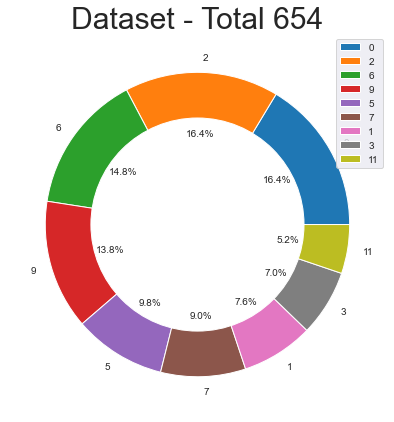

In [9]:
df_balanced = ProcessingData.balancedData(df, 'Classe', 107)
#df_balanced = df

In [10]:
ProcessingData.showLabelsQtd(df_balanced, 'Classe')


Quantidade de itens nas 9 categorias:
0     107
2     107
6      97
9      90
5      64
7      59
1      50
3      46
11     34
Name: Classe, dtype: int64


In [11]:
#Colocando a coluna 'Classe' na primeira posição
col = ['Classe'] + [c for c in range(n_comp)]
df_balanced = df_balanced[col]
df_balanced.head()

,Classe,0,1,2,3,4,5,6,7,8,...,155,156,157,158,159,160,161,162,163,164
1112,0,5.050851,-3.437326,0.880903,1.284616,1.039539,0.332499,-0.112654,-0.929544,0.185957,...,-0.011438,0.053935,-0.054779,-0.073904,0.159497,-0.007450,-0.162417,-0.074369,0.048220,-0.012500
904,0,-4.744892,-1.090630,-1.894263,0.623459,0.556025,0.847031,-0.458654,0.282898,0.140678,...,-0.040528,0.035198,0.022064,-0.056082,-0.027583,0.027975,0.113942,0.141742,-0.046065,-0.016912
1018,0,-0.894416,1.380315,0.817547,0.487481,-3.652643,-0.308384,0.959425,0.111086,-0.468956,...,-0.356680,0.110299,-0.009612,0.263683,-0.146817,0.293372,-0.310733,-0.156633,0.071239,-0.088477
294,0,5.585781,-3.418598,1.011767,1.184437,1.192173,0.112080,-0.042108,-0.783191,-0.261409,...,-0.111518,0.043585,0.039922,-0.039242,0.079242,0.030278,-0.002838,-0.011325,0.029247,-0.033426
1355,0,4.773488,0.741391,-3.426230,0.476568,-1.845094,-0.454420,1.943682,-1.763280,-0.361983,...,0.193053,-0.376187,0.092146,-0.071363,-0.025384,0.182384,0.012432,-0.043817,0.070509,-0.225858


<H2>Aplicação do One Hot Encode

In [30]:
n_classes = len(df_balanced['Classe'].astype(int).value_counts())

datas = df_balanced.iloc[:, 1:].values

enc = preprocessing.OneHotEncoder()
labels = df_balanced.Classe.to_list()
labels = [[la] for la in labels]
enc.fit(labels)
labels_hot = enc.transform(labels).toarray()

<H3>Separando os dados para teste e treino

In [31]:
X_train, X_test, y_train, y_test = train_test_split(datas, labels_hot, test_size=.3, random_state=0)#, stratify=labels)
y_train = np.array(y_train) 
y_test = np.array(y_test) 

<H3>Modelo da rede neural utilizada

In [18]:
model = Sequential()
model.add(Dense(380, activation='relu', input_dim=n_comp))
model.add(Dense(160, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

callbacks = [EarlyStopping(monitor='val_accuracy', patience=25),
        ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]



history = model.fit(X_train, y_train, epochs=200, callbacks=callbacks, validation_data=(X_test, y_test), verbose=1)
model.load_weights('best_model.h5')

Epoch 1/200
15/15 [==============================] - 1s 29ms/step - loss: 1.9236 - accuracy: 0.3042 - val_loss: 1.6750 - val_accuracy: 0.4822
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 1.3300 - accuracy: 0.6193 - val_loss: 1.2585 - val_accuracy: 0.5736
Epoch 3/200
15/15 [==============================] - 0s 12ms/step - loss: 0.9243 - accuracy: 0.7177 - val_loss: 0.9940 - val_accuracy: 0.7157
Epoch 4/200
15/15 [==============================] - 0s 13ms/step - loss: 0.6630 - accuracy: 0.8162 - val_loss: 0.9167 - val_accuracy: 0.7462
Epoch 5/200
15/15 [==============================] - 0s 15ms/step - loss: 0.5040 - accuracy: 0.8621 - val_loss: 0.7972 - val_accuracy: 0.7766
Epoch 6/200
15/15 [==============================] - 0s 15ms/step - loss: 0.3957 - accuracy: 0.8796 - val_loss: 0.8527 - val_accuracy: 0.8071
Epoch 7/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3135 - accuracy: 0.9234 - val_loss: 0.7922 - val_accuracy: 0.8071
Epoch 8

<h3>Avaliação do modelo</h3>
<li>Histórico da evolução do modelo e sua Loss function</li>
<li>Acurácia do modelo nos dados de teste</li>
<li>Matriz de confução</li>


In [19]:
def plot_confusion_matrix(y_test, y_pred, labels, normalize=False):
    cm = confusion_matrix(y_test, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.gcf().set_size_inches(17, 11)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [20]:
def evaluate_model(model, history, X_test, y_test):
    scores = model.evaluate((X_test), y_test, verbose=0)
    print('=========================================')
    print("|| Accuracy: %.2f%%" % (scores[1]*100))
    print('=========================================')

    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title("Accuracy")
    axs[0].legend(['Training', 'Validation'])
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title("Model- Loss")
    axs[1].legend(['Training', 'Validation'])
    fig.tight_layout()

|| Accuracy: 85.28%


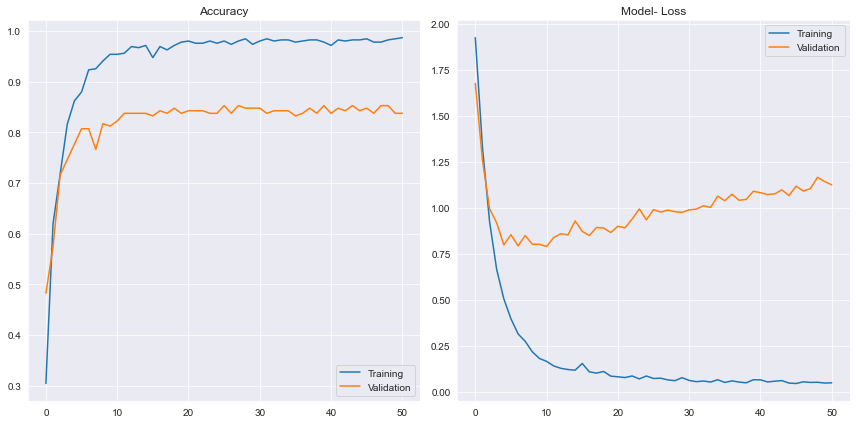

In [21]:
evaluate_model(model, history, X_test, y_test)

Normalized confusion matrix


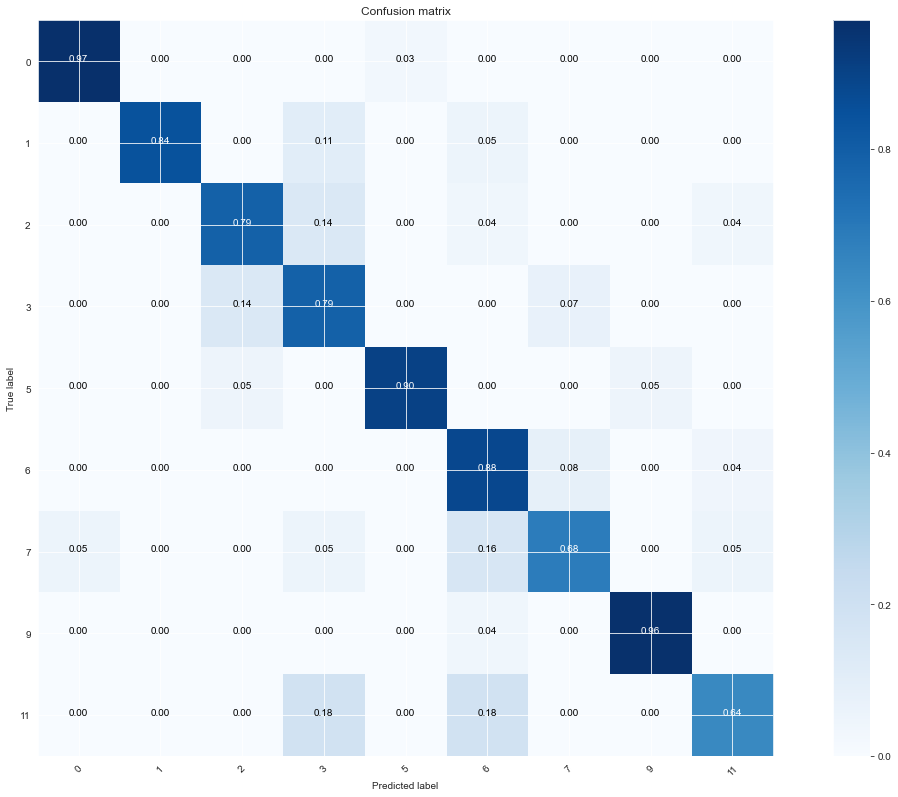

In [22]:
def find_class(probl):
    probl_max = probl.max()
    label = int(np.where(probl == probl_max)[0])

    return  label, round(probl_max*100,1)

prediction_proba = model.predict(X_test)

prediction_cat = [find_class(c)[0] for c in prediction_proba]
y_test_label =  [find_class(c)[0] for c in y_test]


plot_confusion_matrix(y_test_label, prediction_cat, enc.categories_[0], True)

<H3>Área Sob a Curva ROC</h3>
<p>Geralmente, a sensibilidade e a especificidade são características difíceis de conciliar, isto é, é complicado aumentar <br>a sensibilidade e a especificidade de um teste ao mesmo tempo. As curvas ROC (receiver operator characteristic curve) <br>são uma forma de representar a relação, normalmente antagónica, entre a sensibilidade e a especificidade de um teste<br> diagnóstico quantitativo, ao longo de um contínuo de valores de "cutoff point".

In [26]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_output):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], prediction_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), prediction_proba.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

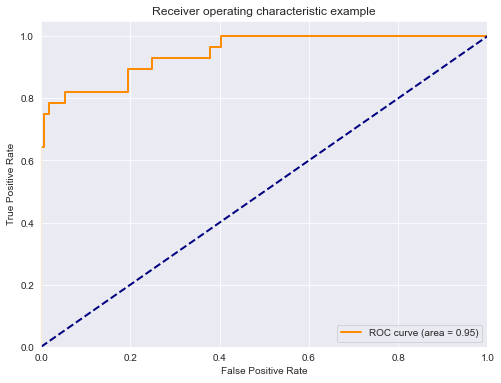

In [27]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


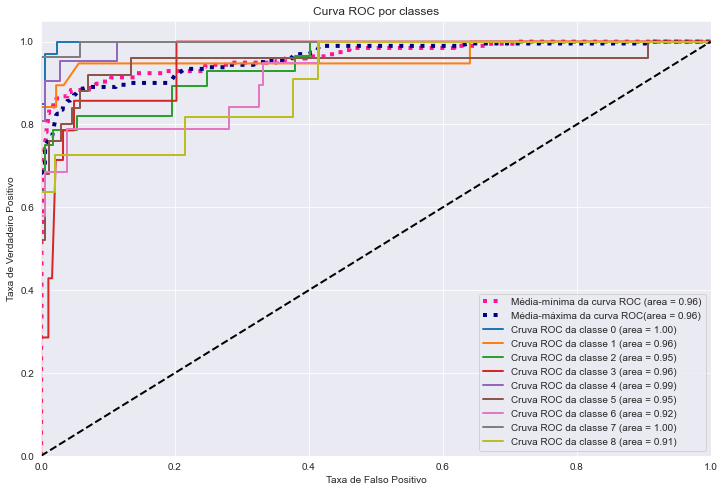

In [35]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="Média-mínima da curva ROC (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="Média-máxima da curva ROC(area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="Cruva ROC da classe {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC por classes")
plt.legend(loc="lower right")
plt.show()